In [41]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns

# Data Exploration

In [2]:
# Load Data

merge_norm = pd.read_csv('/content/drive/MyDrive/btp/Merged_Normalized_Data_Symbols.csv')
phenotype_merge = pd.read_csv('/content/drive/MyDrive/btp/Phenotype_Merged_Data 1.csv')

In [3]:
merge_norm.head()

,Unnamed: 0,GSM95473,GSM95474,GSM95475,GSM95476,GSM95477,GSM95478,GSM95479,GSM95480,GSM95481,...,GSM5656655,GSM5656656,GSM5656657,GSM5656658,GSM472192,GSM472193,GSM472194,GSM472195,GSM472196,GSM472197
0,A1CF,8.846407,9.625563,9.508307,9.858551,9.930799,8.567100,9.735765,9.459892,9.165548,...,6.898708,9.321149,8.389338,9.593756,9.781084,8.963118,9.477648,8.454362,8.040323,6.612389
1,A2M,9.714710,9.704557,10.086870,10.239748,11.148490,10.409552,10.240615,10.769481,10.338638,...,12.060113,10.881447,10.476563,10.184564,9.417345,10.363582,9.683690,10.230567,8.632332,7.870568
2,AADAC,6.172624,7.574756,6.362904,6.463677,5.983201,6.482624,6.579809,6.730853,6.379793,...,3.637297,6.896784,5.714693,7.406848,7.666267,6.476345,6.761059,7.272055,7.087615,6.464802
3,AADACP1,5.325836,5.539462,5.555556,6.045319,4.878937,4.314798,4.855375,5.517888,5.476134,...,3.148435,4.742790,3.882255,5.402277,6.143316,5.052252,4.948389,7.762891,4.765873,4.621603
4,AADAT,5.692912,5.313442,5.621893,5.703505,5.639596,5.534532,6.008965,5.556742,6.159365,...,5.225405,5.354278,5.545389,5.245515,6.553577,6.562740,5.648738,5.695414,6.814153,6.852348


In [4]:
# Re-shape the Merged_Normalized_Data and set index as genes.

merge_norm_new = merge_norm.copy() # Make a new copy of original data.
merge_norm_new = merge_norm_new.rename(columns={'Unnamed: 0': 'sample'}) # Rename the Unnamed colum.
merge_norm_new = merge_norm_new.T # Transpose the dataframe, so that the samples as rows and genes are columns.
merge_norm_new.columns = merge_norm_new.iloc[0,:] # Set the header.
merge_norm_new = merge_norm_new.iloc[1:,:] # Remove repeating row.

In [5]:
merge_norm_new.head()

sample,A1CF,A2M,AADAC,AADACP1,AADAT,AAGAB,AAK1,AASDHPPT,ABAT,ABCA1,...,ZSWIM5,ZSWIM6,ZSWIM7,ZWILCH,ZWINT,ZXDA,ZXDB,ZYG11B,ZYX,ZZEF1
GSM95473,8.846407,9.71471,6.172624,5.325836,5.692912,7.721032,8.993649,8.731914,9.152133,7.308303,...,7.300354,9.07148,7.086336,8.156898,9.361403,6.252753,6.490782,7.94472,7.297446,8.861069
GSM95474,9.625563,9.704557,7.574756,5.539462,5.313442,7.509415,8.921053,8.047152,8.873601,7.292901,...,6.84129,8.86382,7.602607,7.770793,8.679016,5.79816,5.904128,9.139506,6.64828,9.155375
GSM95475,9.508307,10.08687,6.362904,5.555556,5.621893,7.846034,8.545489,8.10606,9.280864,7.27472,...,7.105916,8.918228,7.7113,8.16555,9.137733,5.536626,6.408511,8.214012,6.986236,8.823984
GSM95476,9.858551,10.239748,6.463677,6.045319,5.703505,8.425566,8.542456,8.064173,7.953774,7.044227,...,6.414088,8.591324,6.907509,8.524275,9.618998,5.890167,6.098487,7.782085,7.178727,8.817111
GSM95477,9.930799,11.14849,5.983201,4.878937,5.639596,7.688963,9.148207,8.940123,9.294116,8.735618,...,7.204985,9.465431,7.13316,8.555565,9.808787,6.020766,6.62746,8.102632,7.053141,9.411522


In [6]:
# Re-set the index of Phenotype_Merged_Data

phenotype_merge.set_index('sample', inplace = True)

In [7]:
# Encode the Phenotype labels for analysis.

label_encoder = preprocessing.LabelEncoder()
phenotype_merge['Covariate']= label_encoder.fit_transform(phenotype_merge['Covariate'])

In [8]:
# Encoder label mapping.

le_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_mapping)

{'Adenoma': 0, 'Cancer': 1, 'IBD': 2, 'Normal': 3}


In [9]:
phenotype_merge.head()

,Batch,Covariate,Study,Unnamed: 4
sample,,,,
GSM95473,1,3,GSE4183,1
GSM95474,1,3,GSE4183,2
GSM95475,1,3,GSE4183,3
GSM95476,1,3,GSE4183,4
GSM95477,1,3,GSE4183,5


In [10]:
# Dimensions of the data.

print('Dimensions of Merged_Normalized_Data: ', merge_norm_new.shape)
print('Dimensions of Phenotype_Merged_Data: ', phenotype_merge.shape)

Dimensions of Merged_Normalized_Data:  (1339, 7830)
Dimensions of Phenotype_Merged_Data:  (1339, 4)


In [11]:
# Merged_Normalized_Data information.

merge_norm_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1339 entries, GSM95473 to GSM472197
Columns: 7830 entries, A1CF to ZZEF1
dtypes: object(7830)
memory usage: 80.0+ MB


In [12]:
# Change the datatype of Merged_Normalized_Data from object to float.

merge_norm_new = merge_norm_new.astype(float)

In [13]:
# Check if the datatype is float.

merge_norm_new.dtypes.value_counts()

,count
float64,7830


In [14]:
# Statistics of Merged_Normalized_Data.

merge_norm_new.describe()

sample,A1CF,A2M,AADAC,AADACP1,AADAT,AAGAB,AAK1,AASDHPPT,ABAT,ABCA1,...,ZSWIM5,ZSWIM6,ZSWIM7,ZWILCH,ZWINT,ZXDA,ZXDB,ZYG11B,ZYX,ZZEF1
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,...,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,8.699227,10.092651,6.752377,5.429847,5.748182,7.832689,8.439444,8.693517,8.030729,7.715123,...,6.610775,8.630467,7.378062,8.495974,9.429782,5.828711,6.463651,8.167941,7.832279,8.383353
std,1.052085,0.989759,1.295975,1.089883,0.586710,0.619673,0.593902,0.705287,0.915859,0.811406,...,0.710984,0.614275,0.565380,0.683554,0.823718,0.596360,0.624914,0.577054,0.590008,0.894933
min,3.566713,4.653427,2.173846,2.387865,3.671523,4.039239,6.436483,5.344183,4.907235,5.103556,...,3.612719,6.212731,4.641727,6.049597,5.268885,3.503353,4.062324,5.085703,5.738446,5.165013
25%,8.252531,9.545734,6.266753,4.834060,5.366076,7.511601,7.991893,8.317079,7.507396,7.227598,...,6.229603,8.252827,7.021891,8.055048,8.974027,5.440419,6.039015,7.921214,7.457097,7.706171
50%,8.871346,10.219113,6.745499,5.343787,5.669516,7.942063,8.518388,8.678843,8.175420,7.720376,...,6.733138,8.753796,7.406096,8.498204,9.488321,5.824122,6.426520,8.253059,7.773612,8.459702
75%,9.380318,10.769905,7.280137,6.034355,6.118422,8.243896,8.876500,9.108417,8.655678,8.219835,...,7.102231,9.080289,7.781157,8.961030,9.999092,6.202167,6.889449,8.492686,8.173953,9.048219
max,11.167304,12.920646,17.222321,11.115007,7.787090,9.508624,10.214072,11.294453,11.050931,10.382706,...,8.562546,10.089660,9.248679,10.503630,11.701790,8.248067,8.980653,9.826818,10.580370,10.737880


In [15]:
  # Check for Missing data.

print('Number of null values in Merged_Normalized_Data: ', merge_norm_new.isnull().any().sum())
print('Number of null values in Phenotype_Merged_Data: ', phenotype_merge.isnull().any().sum())

Number of null values in Merged_Normalized_Data:  0
Number of null values in Phenotype_Merged_Data:  0


In [16]:
# Calculate the mean, and standard deviation of the gene expression values.

expr_vals = merge_norm_new.values.flatten()
mean_exp_vals = round(expr_vals.mean(),2)
std_exp_vals = expr_vals.std()

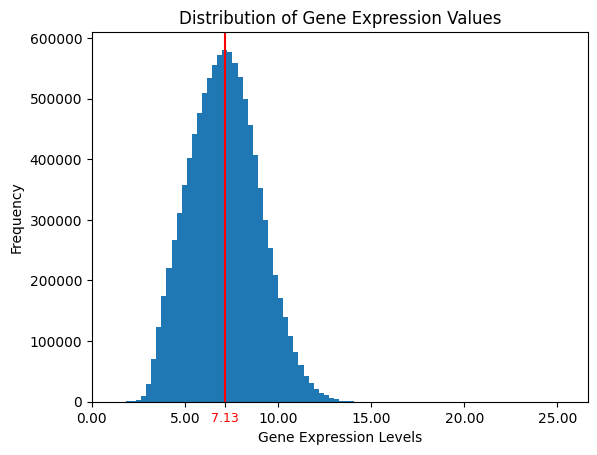

In [17]:
# Distribution of Gene Expression Values across all genes and samples.

plt.hist(expr_vals, bins=100)
plt.xlabel('Gene Expression Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Gene Expression Values')
plt.xlim(left=0)

plt.axvline(x = mean_exp_vals, color = 'red', label = 'mean')

curr_ticks = np.linspace(0, 25, 6,)
new_ticks = np.append(curr_ticks, mean_exp_vals)
plt.xticks(new_ticks)

for tick in plt.gca().get_xticklabels():
    if float(tick.get_text()) == mean_exp_vals:
        tick.set_color('red')
        tick.set_fontsize(tick.get_fontsize() - 1)

plt.show()

<ipython-input-43-c4082c38b135>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=expr_vals, hist=False)


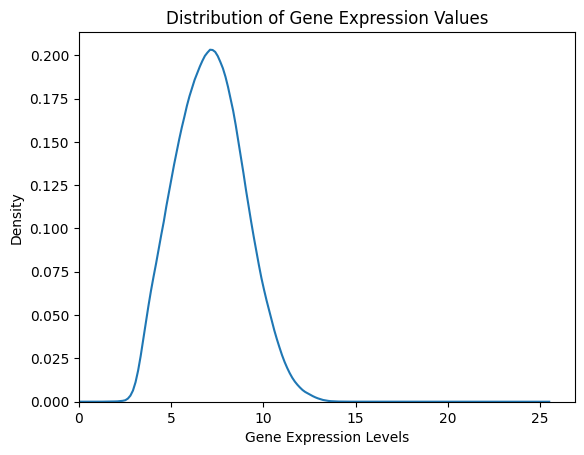

In [43]:
sns.displot(a=expr_vals, hist=False)
plt.title('Distribution of Gene Expression Values')
plt.xlabel('Gene Expression Levels')
plt.xlim(left=0)
plt.show()

[]

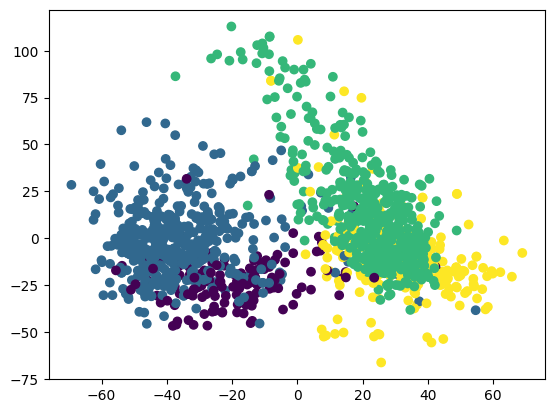

In [18]:
pca = PCA(n_components=2)
components = pca.fit_transform(merge_norm_new.values)

plt.scatter(components[:,0],components[:,1], c = phenotype_merge['Covariate'])
plt.plot()

In [19]:
# pca = PCA(n_components=3)
# components = pca.fit_transform(merge_norm_new.values)

# total_var = pca.explained_variance_ratio_.sum() * 100

# fig = px.scatter_3d(
#     components, x=0, y=1, z=2, color=phenotype_merge['Covariate'],
#     title=f'Total Explained Variance: {total_var:.2f}%',
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
# )
# fig.show()

In [20]:
# corr_matrix = merge_norm_new.corr()
# sns.heatmap(corr_matrix, cmap='coolwarm', square=True)
# plt.show()

In [54]:
# Class Distribution

inv_map = {v: k for k, v in le_mapping.items()}

class_info = phenotype_merge['Covariate'].value_counts()
class_info = class_info.reset_index()
class_info['Covariate'] = class_info['Covariate'].map(inv_map)
class_info

,Covariate,count
0,Adenoma,479
1,Cancer,451
2,IBD,266
3,Normal,143


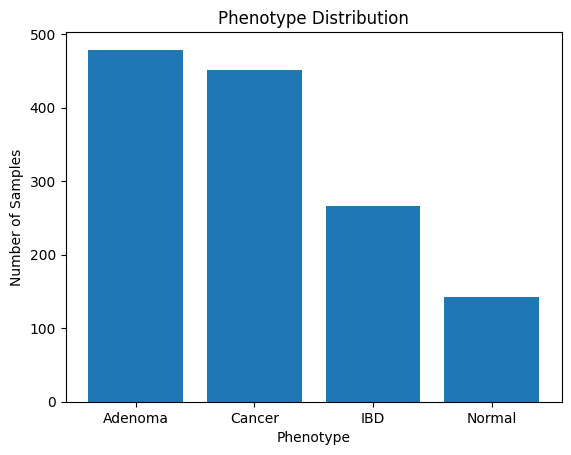

In [55]:
plt.bar(class_info['Covariate'],class_info['count'])

plt.xlabel("Phenotype")
plt.ylabel("Number of Samples")
plt.title("Phenotype Distribution")
plt.show()

# Data Pre-processing

In [23]:
# Merge the data to ensure that the data that is input into the model is labelled.

merged_data = pd.merge(merge_norm_new, phenotype_merge[['Covariate']], left_index=True, right_index=True)

In [25]:
merged_data.head()

,A1CF,A2M,AADAC,AADACP1,AADAT,AAGAB,AAK1,AASDHPPT,ABAT,ABCA1,...,ZSWIM6,ZSWIM7,ZWILCH,ZWINT,ZXDA,ZXDB,ZYG11B,ZYX,ZZEF1,Covariate
GSM95473,8.846407,9.714710,6.172624,5.325836,5.692912,7.721032,8.993649,8.731914,9.152133,7.308303,...,9.071480,7.086336,8.156898,9.361403,6.252753,6.490782,7.944720,7.297446,8.861069,3
GSM95474,9.625563,9.704557,7.574756,5.539462,5.313442,7.509415,8.921053,8.047152,8.873601,7.292901,...,8.863820,7.602607,7.770793,8.679016,5.798160,5.904128,9.139506,6.648280,9.155375,3
GSM95475,9.508307,10.086870,6.362904,5.555556,5.621893,7.846034,8.545489,8.106060,9.280864,7.274720,...,8.918228,7.711300,8.165550,9.137733,5.536626,6.408511,8.214012,6.986236,8.823984,3
GSM95476,9.858551,10.239748,6.463677,6.045319,5.703505,8.425566,8.542456,8.064173,7.953774,7.044227,...,8.591324,6.907509,8.524275,9.618998,5.890167,6.098487,7.782085,7.178727,8.817111,3
GSM95477,9.930799,11.148490,5.983201,4.878937,5.639596,7.688963,9.148207,8.940123,9.294116,8.735618,...,9.465431,7.133160,8.555565,9.808787,6.020766,6.627460,8.102632,7.053141,9.411522,3


# Feature Selection

In [27]:
# Import necessary libraries.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [31]:
# Function to plot accuracy results vs number of genes

def plot_accuracy_vs_genes(accuracy_results, method_name):
    num_genes_used = [x[0] for x in accuracy_results] # Number of genes
    accuracies = [x[1] for x in accuracy_results] # Accuracy for each list of genes

    plt.plot(num_genes_used, accuracies)
    plt.xlabel('Number of Genes')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. Number of Genes ({method_name})')
    plt.show()

# ANOVA F-Test Feature Selection

def anova_f_test(X_train,X_test,y_train,y_test):
  accuracy_results = []
  selected_genes_list = []
  best_accuracy = 0
  best_genes = None

  for num_genes in range(1, 20):
    # Select top genes using anova
    selector = SelectKBest(f_classif, k=num_genes)
    X_new = selector.fit_transform(X_train, y_train)
    X_test_reduced = selector.transform(X_test)

    # train the random forest classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_new, y_train)
    y_pred = clf.predict(X_test_reduced)

    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append((num_genes, accuracy))

    # selected genes
    selected_gene_names = X_train.columns[selector.get_support()]
    selected_genes_list.append(selected_gene_names)

    # store the best accuracy and the corresponding list of genes
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_genes = selected_gene_names

    # print(f"Num Genes: {num_genes}, Accuracy: {accuracy}")

  plot_accuracy_vs_genes(accuracy_results, "ANOVA F-Test")
  return selected_genes_list, accuracy_results, best_genes, best_accuracy

# Lasso Feature Selection

def lasso_feature_selection(X_train,X_test,y_train,y_test):
  accuracy_results = []
  selected_genes_list = []
  best_accuracy = 0
  best_genes = None

  for alpha in np.linspace(0.001, 0.1):
    # select genes
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    selected_genes = X.columns[lasso.coef_ != 0]
    selected_genes_list.append(selected_genes)

    X_train_reduced = X_train[selected_genes]
    X_test_reduced = X_test[selected_genes]

    # train the random forest model
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append((len(selected_genes), accuracy))

    # store the best accuracy and the corresponding list of genes
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_genes = selected_genes

    # print(f"Num Genes: {len(selected_genes)}, Accuracy: {accuracy}")

  plot_accuracy_vs_genes(accuracy_results, "Lasso")
  return selected_genes_list, accuracy_results, best_genes, best_accuracy

# Random Forest Feature Selection

def random_forest(X_train,X_test,y_train,y_test):
  # Classify the data
  rf = RandomForestClassifier(random_state=42)
  rf.fit(X_train, y_train)

  # Extract the feature imporatnce value for each gene
  importances = rf.feature_importances_

  # Sort the data by feature importance value
  gene_importance = pd.DataFrame({'Gene': X.columns, 'Importance': importances})
  gene_importance.sort_values(by='Importance', ascending=False, inplace=True)

  accuracy_results = []
  selected_genes_list = []
  best_accuracy = 0
  best_genes = None

  for num_genes in range(1, 20):
    # select genes
    top_genes = gene_importance.head(num_genes)['Gene']
    selected_genes_list.append(top_genes)

    # modify the data to contain only selected genes as features
    X_train_reduced = X_train[top_genes]
    X_test_reduced = X_test[top_genes]

    # train the random forest model
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_reduced, y_train)

    # predict using the random forest model
    y_pred = clf.predict(X_test_reduced)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append((num_genes, accuracy))

    # store the best accuracy and the corresponding list of genes
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_genes = top_genes
    # print(f"Num Genes: {num_genes}, Accuracy: {accuracy}")

  plot_accuracy_vs_genes(accuracy_results, "Random Forest")
  return selected_genes_list, accuracy_results, best_genes, best_accuracy

def clf_thresholds(clf, X_test_reduced, y_test_binary, thresholds=[0.90, 0.95]):
  # Get predicted probabilities for the cancerous class
  y_pred_prob = clf.predict_proba(X_test_reduced)[:, 1]

  for threshold in thresholds:
    # Apply threshold to classify cancerous vs. non-cancerous samples
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test_binary, y_pred_threshold)
    precision = precision_score(y_test_binary, y_pred_threshold)
    recall = recall_score(y_test_binary, y_pred_threshold)
    f1 = f1_score(y_test_binary, y_pred_threshold)

    print(f'\nThreshold {threshold}:')
    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F1 Score = {f1}')

In [32]:
# Train-test split.

X = merged_data.iloc[:,:-1]
y = merged_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(merged_data.iloc[:,:-1], merged_data.iloc[:,-1], test_size=0.3, random_state=42)

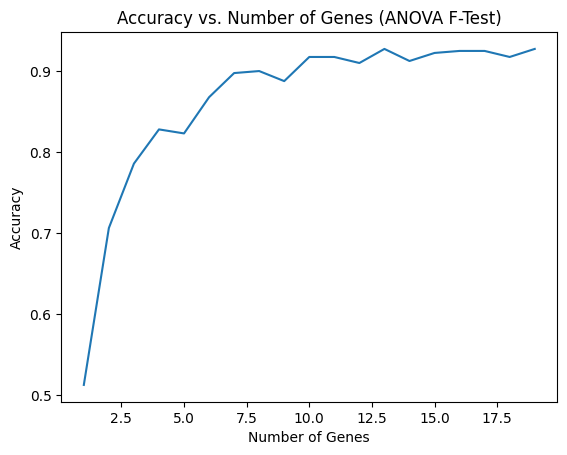

In [33]:
# Anova F-test Feature Selection.

anova_list, anova_list_acc, anova_genes, anova_acc = anova_f_test(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.270e+00, tolerance: 7.866e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.562e+00, tolerance: 7.866e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.823e+00, tolerance: 7.866e

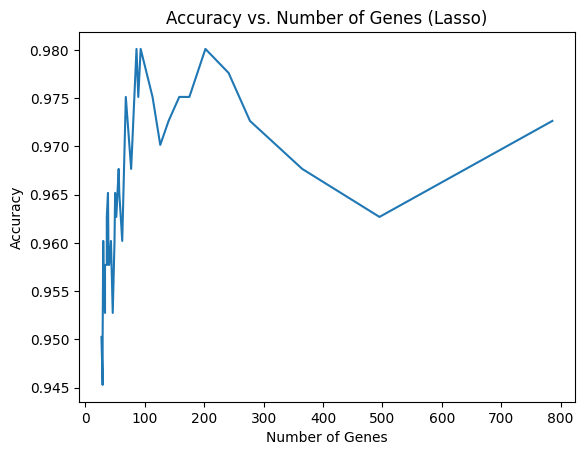

In [40]:
# Lasso Feature Selection.

lasso_list, lasso_list_acc,lasso_genes, lasso_acc = lasso_feature_selection(X_train, X_test, y_train, y_test)

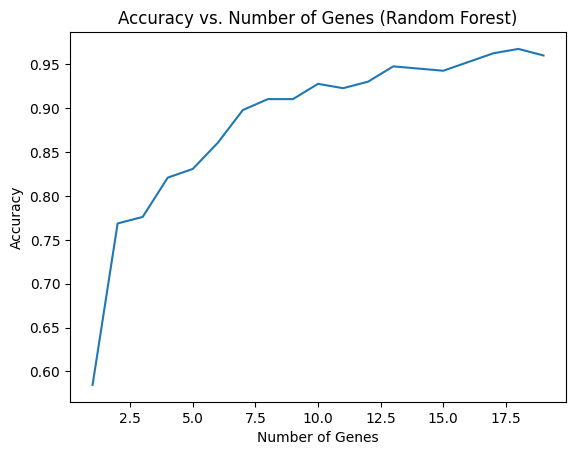

In [35]:
# Random Forest Feature Selection.

rf_list, rf_list_acc, rf_genes, rf_acc = random_forest(X_train, X_test, y_train, y_test)

# Classification

In [36]:
# Set the class of cancer samples as 1 and the rest as 0

y_train_bin = y_train.apply(lambda x: 1 if x == 1 else 0)
y_test_bin = y_test.apply(lambda x: 1 if x == 1 else 0)

## Classification metrics at various thresholds (0.90, 0.95)

In [37]:
# Anova F-test Feature Selection and Random Forest Classification

X_train_anova = X_train[anova_genes]
X_test_anova = X_test[anova_genes]

rf_clf_anv = RandomForestClassifier(random_state=42)
rf_clf_anv.fit(X_train_anova, y_train_bin)

clf_thresholds(rf_clf_anv, X_test_anova, y_test_bin)


Threshold 0.9:
Accuracy = 0.8383084577114428
Precision = 0.9866666666666667
Recall = 0.5362318840579711
F1 Score = 0.6948356807511737

Threshold 0.95:
Accuracy = 0.7786069651741293
Precision = 1.0
Recall = 0.35507246376811596
F1 Score = 0.5240641711229946


In [38]:
# Lasso Feature Selection and Random Forest Classification

X_train_lasso = X_train[lasso_genes]
X_test_lasso = X_test[lasso_genes]

rf_clf_las = RandomForestClassifier(random_state=42)
rf_clf_las.fit(X_train_lasso, y_train_bin)

clf_thresholds(rf_clf_las, X_test_lasso, y_test_bin)


Threshold 0.9:
Accuracy = 0.8681592039800995
Precision = 1.0
Recall = 0.6159420289855072
F1 Score = 0.7623318385650224

Threshold 0.95:
Accuracy = 0.7985074626865671
Precision = 1.0
Recall = 0.41304347826086957
F1 Score = 0.5846153846153846


In [39]:
X_train_rf = X_train[rf_genes]
X_test_rf = X_test[rf_genes]

rf_clf_rf = RandomForestClassifier(random_state=42)
rf_clf_rf.fit(X_train_rf, y_train_bin)

clf_thresholds(rf_clf_rf, X_test_rf, y_test_bin, thresholds=[0.90, 0.95])


Threshold 0.9:
Accuracy = 0.8482587064676617
Precision = 0.9873417721518988
Recall = 0.5652173913043478
F1 Score = 0.7188940092165899

Threshold 0.95:
Accuracy = 0.8009950248756219
Precision = 0.9833333333333333
Recall = 0.427536231884058
F1 Score = 0.5959595959595959


## TCGA COAD dataset

In [56]:
tcga_coad = pd.read_csv('/content/drive/MyDrive/btp/normalized_counts_tcga_coad 1.csv')

In [57]:
tcga_coad.head()

,TCGA-5M-AAT6-01A-11R-A41B-07,TCGA-AA-3552-01A-01R-0821-07,TCGA-AA-3867-01A-01R-1022-07,TCGA-AD-6895-01A-11R-1928-07,TCGA-AA-3560-01A-01R-0821-07,TCGA-CM-6676-01A-11R-1839-07,TCGA-AA-A029-01A-01R-A00A-07,TCGA-AA-A01C-01A-01R-A00A-07,TCGA-CK-5912-01A-11R-1653-07,TCGA-AA-A03F-01A-11R-A16W-07,...,TCGA-QL-A97D-01A-12R-A41B-07,TCGA-A6-2677-01A-01R-0821-07,TCGA-AZ-6608-01A-11R-1839-07,TCGA-AA-A024-01A-02R-A00A-07,TCGA-G4-6294-01A-11R-1774-07,TCGA-AZ-6601-01A-11R-1774-07,TCGA-AA-3672-01A-01R-0905-07,TCGA-AA-3524-01A-02R-0821-07,TCGA-AA-3715-01A-01R-0905-07,TCGA-AA-3531-01A-01R-0821-07
TSPAN6,1102.216184,6506.327147,8409.125055,582.748329,8850.321790,7389.829254,2552.993134,6312.360453,9718.069726,1190.572602,...,3801.607693,7425.776014,6743.187211,5705.905665,9934.044338,2610.315063,1563.277155,7016.224228,817.510609,7570.863790
TNMD,3.634678,10.900979,3.219420,0.000000,91.847405,244.567260,31.210185,25.440244,31.225222,71.291773,...,128.591103,124.190587,31.316043,145.824533,10.107215,4.230657,15.632772,159.548083,10.092724,21.024337
DPM1,1121.298245,1319.018452,1950.968523,1106.855316,1062.132817,3028.484560,1248.407401,1892.118121,3126.425356,331.506743,...,2521.380247,1707.877165,2511.305767,741.621912,2547.018083,985.138586,432.506680,3284.355656,421.371209,1435.962224
SCYL3,329.847053,376.862415,371.843011,417.086540,468.657274,398.600625,368.280183,238.502284,577.666608,306.554622,...,473.158423,584.003670,348.089864,410.391901,452.803215,342.683177,338.710050,501.992748,423.894390,332.184526
C1orf112,295.317609,174.415663,214.091430,208.909778,459.237027,246.453383,246.560462,232.142223,515.216163,167.535666,...,412.059888,561.423563,289.673399,141.658118,330.169011,354.166387,312.655431,513.666998,552.576615,544.530331


In [59]:
print('Dimensions of the TCGA COAD dataset: ', tcga_coad.shape)

Dimensions of the TCGA COAD dataset:  (60660, 522)
